In [30]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [31]:
bitdf = pd.read_csv("../datasets/Bitcoin.csv")
nasdf = pd.read_csv("../datasets/Nasdaq.csv")
result = pd.merge(bitdf, nasdf, on="Date", suffixes=("_Bitcoin", "_Nasdaq"))
result = result.reindex(index=result.index[::-1])
result

,Date,Price (USD)_Bitcoin,Price (USD)_Nasdaq
1194,03/08/2019,3865.9,7015.69
1193,03/11/2019,3865.1,7164.02
1192,03/12/2019,3886.0,7201.28
1191,03/13/2019,3864.9,7256.98
1190,03/14/2019,3879.8,7243.01
...,...,...,...
4,02/07/2024,44507.2,17755.07
3,02/08/2024,45930.2,17783.17
2,02/09/2024,47290.7,17962.41
1,02/12/2024,49924.4,17882.66


In [37]:
def drawplot(df, poslabel, neglabel, interval):
    plt.figure(figsize=(20,15))
    plt.plot(df['Date'], df[f'Price (USD)_{neglabel}'], label=neglabel, color='red')

    plt.plot(df['Date'], df[f'Price (USD)_{poslabel}'], label=poslabel, color='green')

    plt.title(f'{poslabel} is defeating {neglabel}', fontsize=50)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    n = interval  # Shows every 5th label.
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % n != 0:
            label.set_visible(False)
    start_nasdaq = df['Price (USD)_Nasdaq'].iloc[0]
    end_nasdaq = df['Price (USD)_Nasdaq'].iloc[-1]
    start_bitcoin = df['Price (USD)_Bitcoin'].iloc[0]
    end_bitcoin = df['Price (USD)_Bitcoin'].iloc[-1]
    plt.plot([df['Date'].iloc[0], df['Date'].iloc[-1]], [start_nasdaq, end_nasdaq], label='Nasdaq Trend', color='red', linestyle='--')
    plt.plot([df['Date'].iloc[0], df['Date'].iloc[-1]], [start_bitcoin, end_bitcoin], label='Bitcoin Trend', color='green', linestyle='--')
    plt.savefig(f"../images/{poslabel}_over_{neglabel}.png")
    

In [38]:
def drawplot_fair(df, label1, label2, interval):
    plt.figure(figsize=(20,15))
    plt.plot(df['Date'], df[f'Price (USD)_{label1}'], label=label1, color='red')

    plt.plot(df['Date'], df[f'Price (USD)_{label2}'], label=label2, color='green')

    plt.title(f'{label1} & {label2} Trend', fontsize=50)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    n = interval  # Shows every 5th label.
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % n != 0:
            label.set_visible(False)
    plt.savefig(f"../images/{label1}_vs_{label2}_trend.png")
    plt.show()

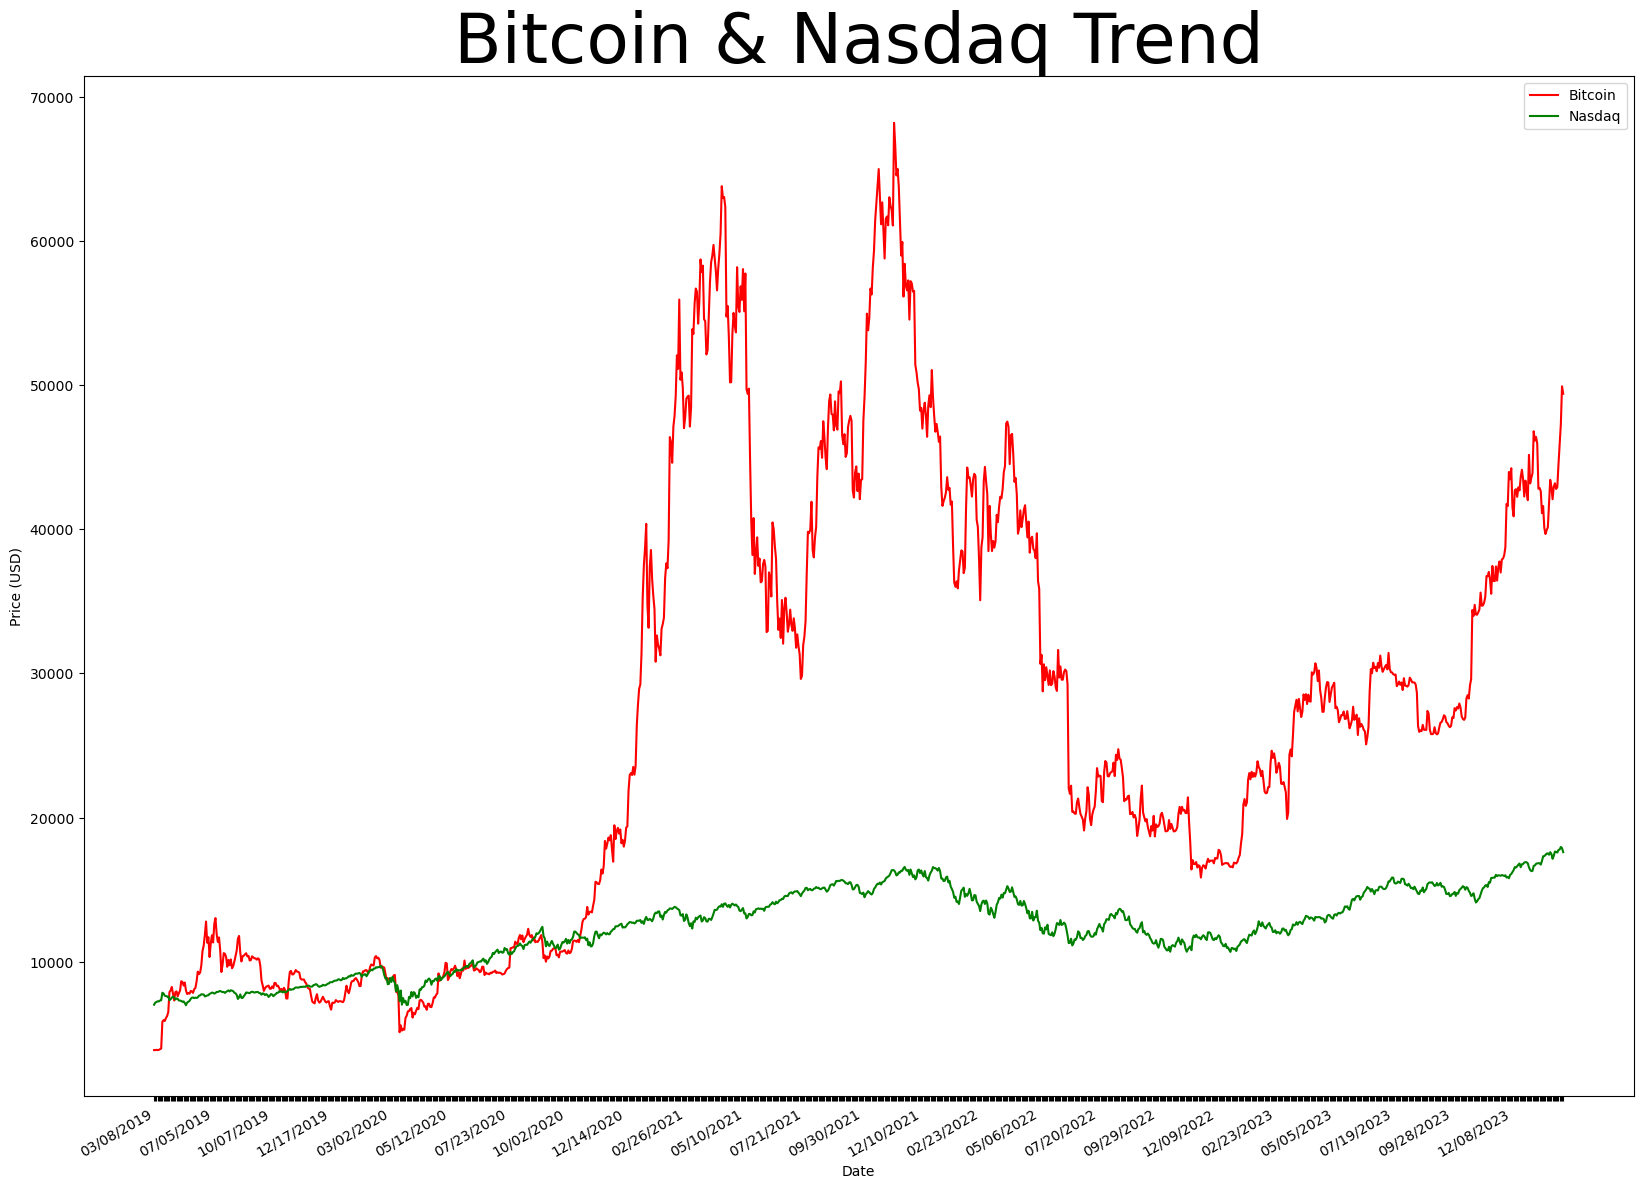

In [39]:
drawplot_fair(result, "Bitcoin", "Nasdaq", 50)

In [40]:
bitpre = result[900:]
bitpre

,Date,Price (USD)_Bitcoin,Price (USD)_Nasdaq
294,12/09/2022,17156.1,11563.33
293,12/12/2022,17163.6,11706.44
292,12/13/2022,17762.1,11834.21
291,12/14/2022,17693.6,11740.92
290,12/15/2022,17403.0,11345.22
...,...,...,...
4,02/07/2024,44507.2,17755.07
3,02/08/2024,45930.2,17783.17
2,02/09/2024,47290.7,17962.41
1,02/12/2024,49924.4,17882.66


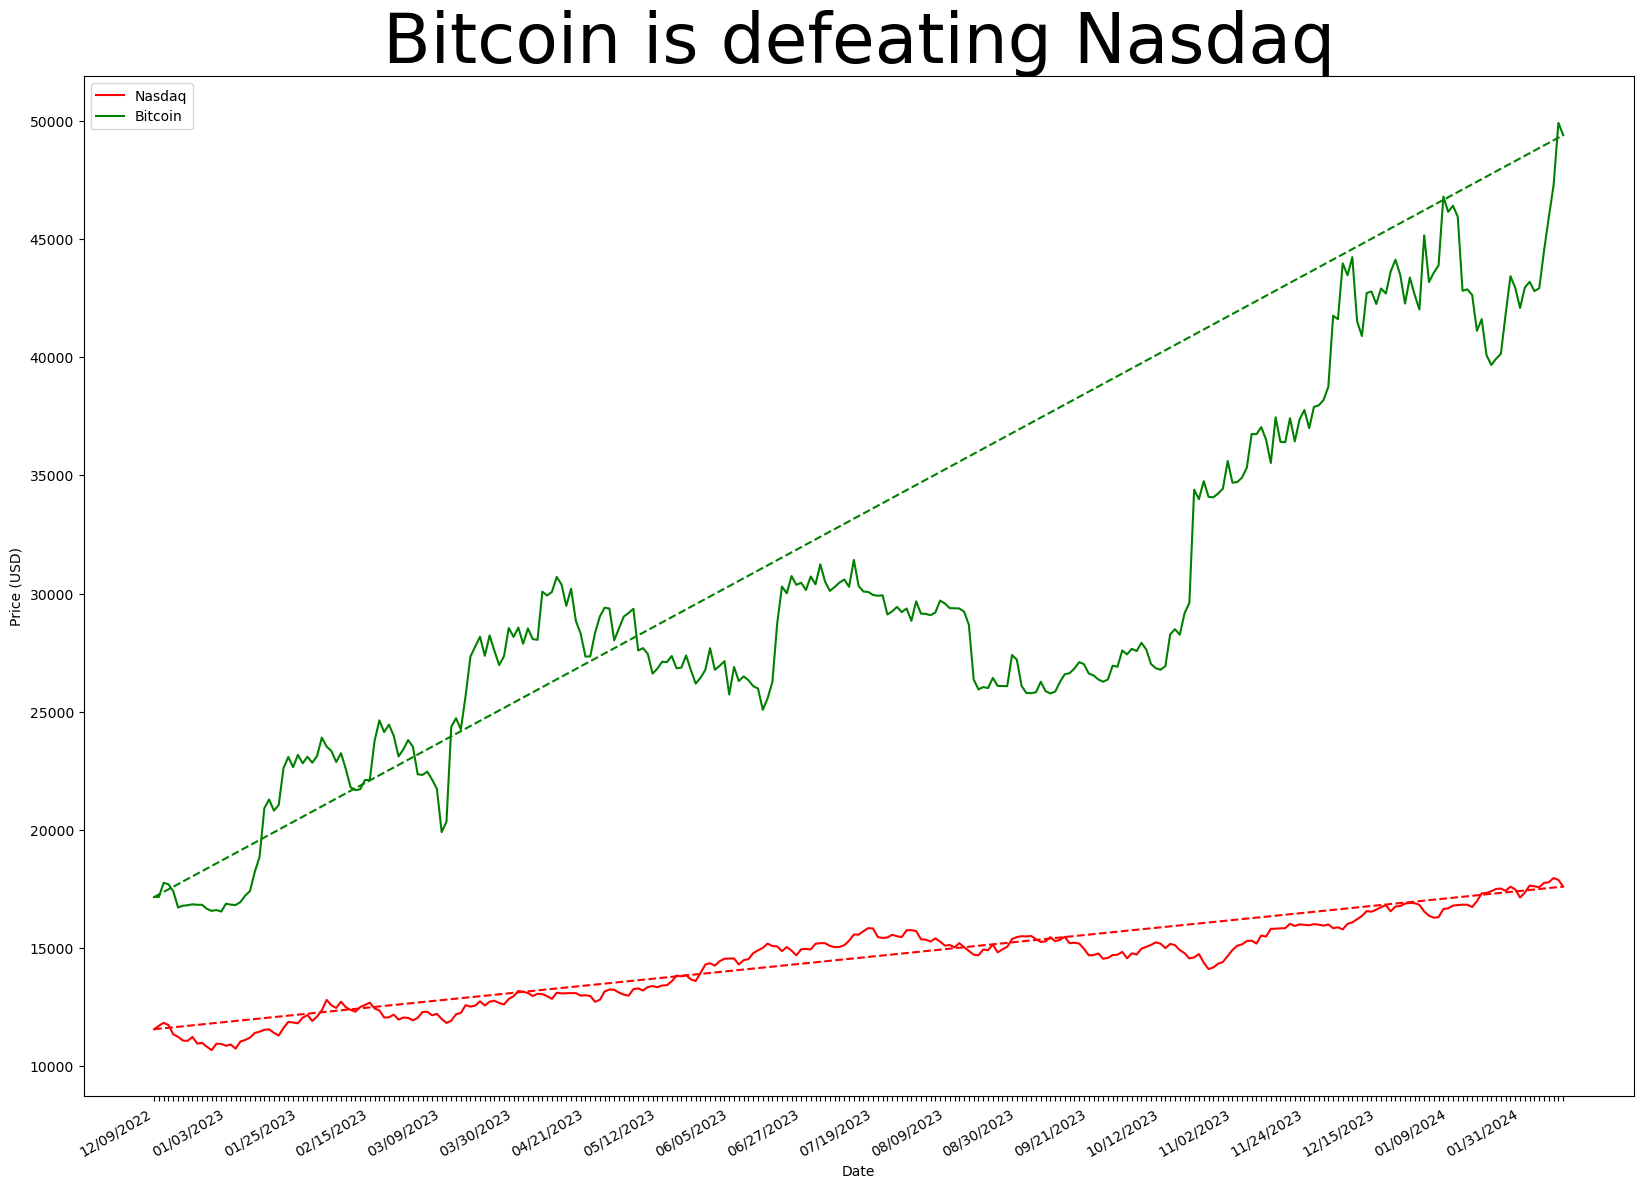

In [41]:
drawplot(bitpre, "Bitcoin", "Nasdaq", 15)
plt.show()

In [11]:
naspre = result[:140]
naspre

,Date,Price (USD)_Bitcoin,Price (USD)_Nasdaq
1194,03/08/2019,3865.9,7015.69
1193,03/11/2019,3865.1,7164.02
1192,03/12/2019,3886.0,7201.28
1191,03/13/2019,3864.9,7256.98
1190,03/14/2019,3879.8,7243.01
...,...,...,...
1059,11/25/2019,7158.0,8371.93
1058,11/26/2019,7111.6,8385.75
1057,11/27/2019,7490.6,8444.71
1056,11/29/2019,7745.6,8403.68


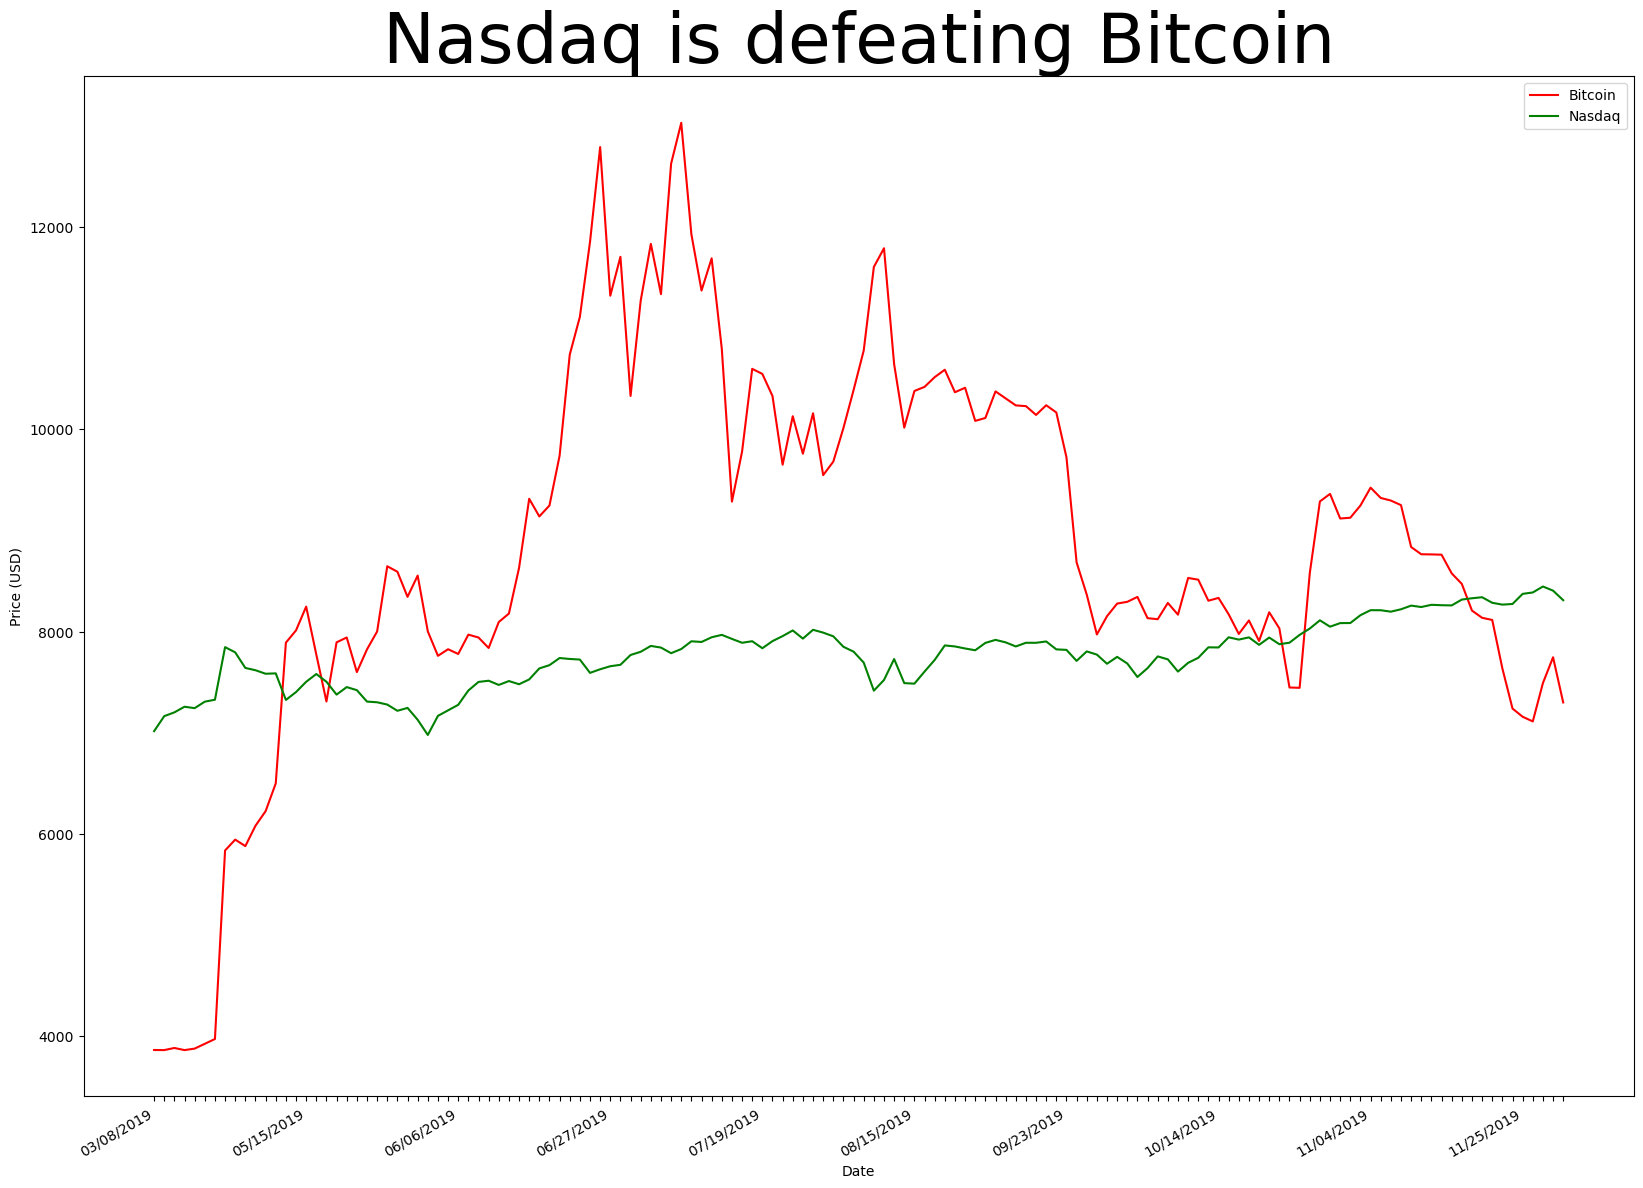

In [31]:
drawplot(naspre, "Nasdaq", "Bitcoin", 15)